#  Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

### Data Representation in Scikit-Learn

#### Data as table

In [2]:
import seaborn as sns
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data)

In [4]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Features matrix

The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features]

In [5]:
X_iris = iris_df

#### Target array

While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional [n_samples, n_targets] target array, we will primarily be working with the common case of a one-dimensional target array.

In [6]:
y_iris = iris.target

## Scikit-Learn’s Estimator API

*Consistency*

All objects share a common interface drawn from a limited set of methods, with
consistent documentation.

*Inspection*

All specified parameter values are exposed as public attributes.

*Limited object hierarchy*

Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

*Composition*

Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

*Sensible defaults*

When models require user-specified parameters, the library defines an appropriate default value.

### Basics of the API

The steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from ScikitLearn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:

• For supervised learning, often we predict labels for unknown data using the
predict() method.

• For unsupervised learning, we often transform or infer properties of the data
using the transform() or predict() method.

### Supervised learning example: Simple linear regression

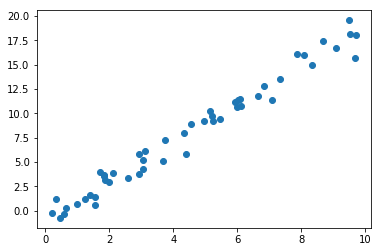

In [7]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = (2 * x) - 1 + rng.randn(50)
plt.scatter(x, y);

##### 1. Choose a class of model.

In [8]:
from sklearn.linear_model import LinearRegression

##### 2. Choose model hyperparameters.

We might need to answer one or more questions like the following:
• Would we like to fit for the offset (i.e., intercept)?

• Would we like the model to be normalized?

• Would we like to preprocess our features to add model flexibility?

• What degree of regularization would we like to use in our model?

• How many model components would we like to use?

In [9]:
model = LinearRegression(fit_intercept=True)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data.

##### 3. Arrange data into a features matrix and target vector.

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

##### 4. Fit the model to your data.

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in modelspecific attributes that the user can explore.

 In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example, in this linear model, we have the following:

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311164

##### 5. Predict labels for unknown data.

In [14]:
xfit = np.linspace(-1, 11)

In [15]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

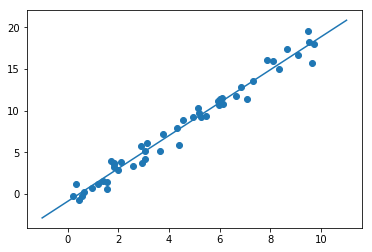

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning example: Iris classification

### Supervised learning example: Iris classification

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

In [21]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

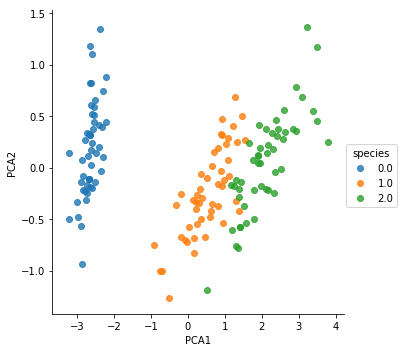

In [22]:
iris_2d = pd.DataFrame(np.concatenate((X_2D[:, 0:2], iris.target.reshape(-1,1)), axis=1), columns=["PCA1", "PCA2","species"])
sns.lmplot("PCA1", "PCA2", hue='species', data=iris_2d, fit_reg=False);

## Unsupervised learning: Iris clustering

In [23]:
from sklearn.mixture import GaussianMixture  # 1. Choose the model class
model = GaussianMixture (n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

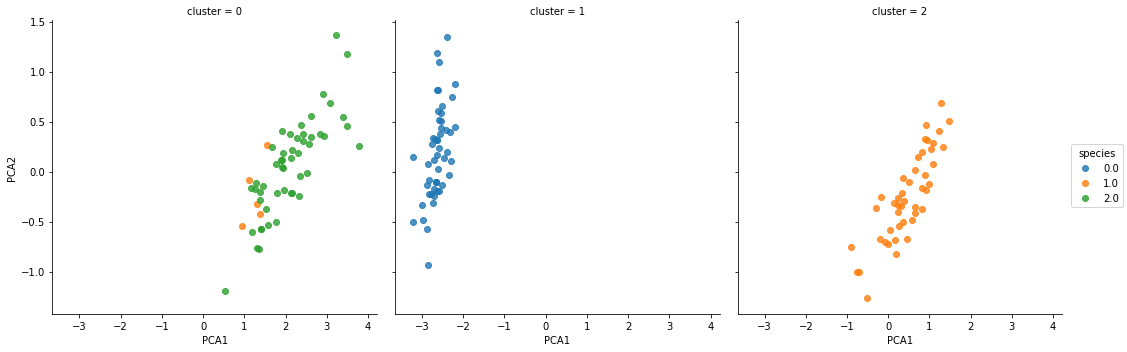

In [24]:
iris_2d['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris_2d, hue='species',
col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits

### Loading and visualizing the digits data

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels. 

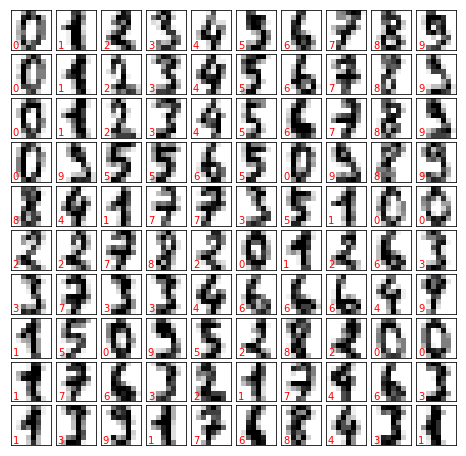

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='red')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each  pixel in the image as a feature that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.

In [27]:
X = digits.data

In [28]:
X.shape

(1797, 64)

In [29]:
y = digits.target

In [30]:
y.shape

(1797,)

##### Unsupervised learning: Dimensionality reduction

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll
reduce the dimensions to 2, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called **Isomap**:

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

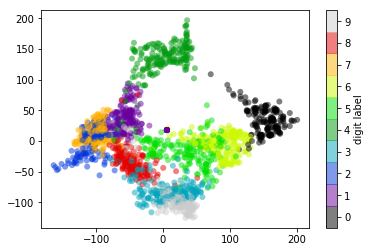

In [32]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### Plot confusion matrix

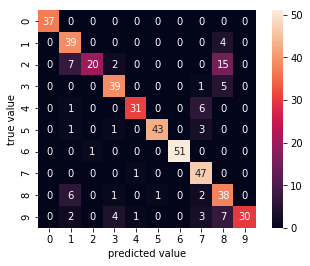

In [36]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

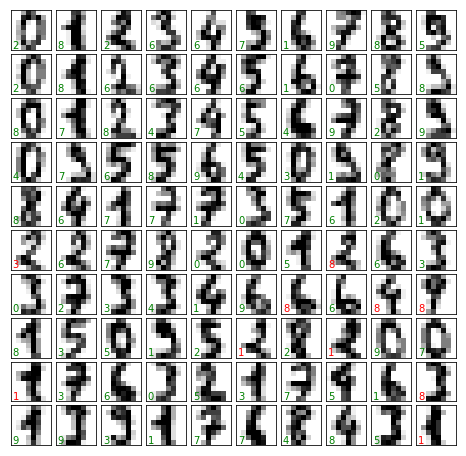

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
    transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')

## Hyperparameters and Model Validation

Basic recipe for applying a supervised machine learning model:
1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

We need a way to *validate* that our model and our hyperparameters are a good fit to the data. 

#### Thinking About Model Validation

##### Model validation the wrong way

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

In [39]:
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we’ll use a k-neighbors classifier with *n_neighbors=1*. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [41]:
model.fit(X, y)
y_model = model.predict(X)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

This approach contains a fundamental flaw: it trains and evaluates the model on the same data.

Furthermore, the nearest neighbor model is an *instance-based* estimator that simply stores the training data, and predicts labels by comparing new data to these stored points; except in contrived cases, it will get 100% accuracy every time!

##### Model validation the right way: Holdout sets

Holdout set: We hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. 

In [43]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9066666666666666

##### Model validation via cross-validation

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training.

One way to address this is to use **cross-validation**;that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

##### Two-fold cross-validation example

In [44]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
np.mean([accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)])

0.9333333333333333

We could expand on this idea to use even more trials, and more folds in the data:

In [45]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

We might wish to go to the extreme case in which our number of folds is equal to the number of data points; that is, we train on all points but one in each trial. This type of cross-validation is known as **leave-one-out cross-validation**, and can be used as follows:

In [46]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))

In [47]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
scores.mean()

0.96

### Selecting the Best Model

If our estimator is underperforming, how should we move forward? 

• Use a more complicated/more flexible model

• Use a less complicated/less flexible model

• Gather more training samples

• Gather more data to add features to each sample

The answer to this question is often counterintuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! 

#### The bias–variance trade-off

• For high-bias models, the performance of the model on the validation set is simi‐
lar to the performance on the training set.

• For high-variance models, the performance of the model on the validation set is
far worse than the performance on the training set.

![alt text](images/variance.png "A high-bias and high-variance regression model")

![alt text](images/curve.png "Training and validation scores in high-bias and high-variance models")

A **validation curve**, and we see the following essential features:

![alt text](images/p3.png "A schematic of the relationship between model complexity, training score, and validation score")

• The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.

• For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.

• For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.

• For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

### Validation curves in Scikit-Learn

An example of using cross-validation to compute the validation curve for a polynomial regression model.

We can implement this with a simple linear regression combined with the polynomial preprocessor. We will use a pipeline to string these operations together:

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [50]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

Now let’s create some data to which we will fit our model:

In [51]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1) #(10 - 1/x)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [52]:
X, y = make_data(40)

Visualize our data, along with polynomial fits of several degrees:

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

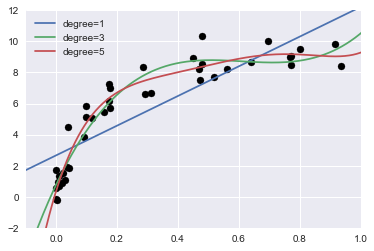

In [54]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Visualizing the validation curve for this particular data and model; we can do this straightforwardly using the **validation_curve** convenience routine provided by Scikit-Learn. 
Given a model, data, parameter name, and a range to explore, this function will automatically compute both the *training score* and *validation score* across the range:

In [55]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',
degree, cv=7)
# (21, 7)

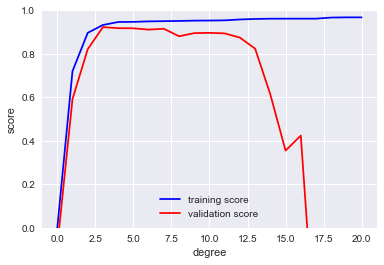

In [56]:
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

From the validation curve, we can read off that the optimal trade-off between bias and variance is found for a third-order polynomial:

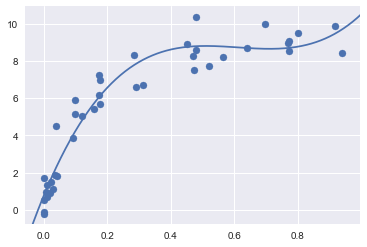

In [57]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

A plot of the training/validation score with respect to the size of the training set is known as a **learning curve**.

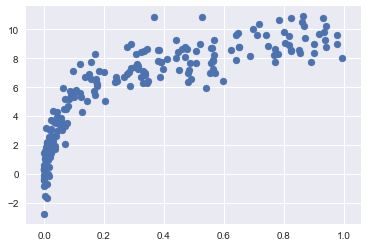

In [58]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

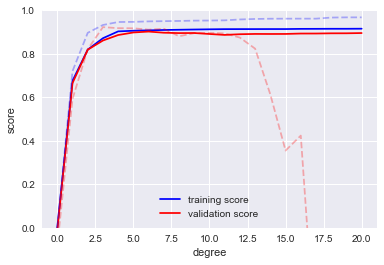

In [59]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

It is clear from the validation curve that the larger data‐ set can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data the validation and training scores remain very close.

The general behavior we would expect from a learning curve is this:

• A model of a given complexity will overfit a small dataset: this means the training
score will be relatively high, while the validation score will be relatively low.

• A model of a given complexity will underfit a large dataset: this means that the
training score will decrease, but the validation score will increase.

• A model will never, except by chance, give a better score to the validation set than
the training set: this means the curves should keep getting closer together but
never cross.

![alt text](images/learncurve.png "Schematic showing the typical interpretation of learning curves")

In [60]:
X.shape

(40, 1)

### Learning curves in Scikit-Learn

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34]


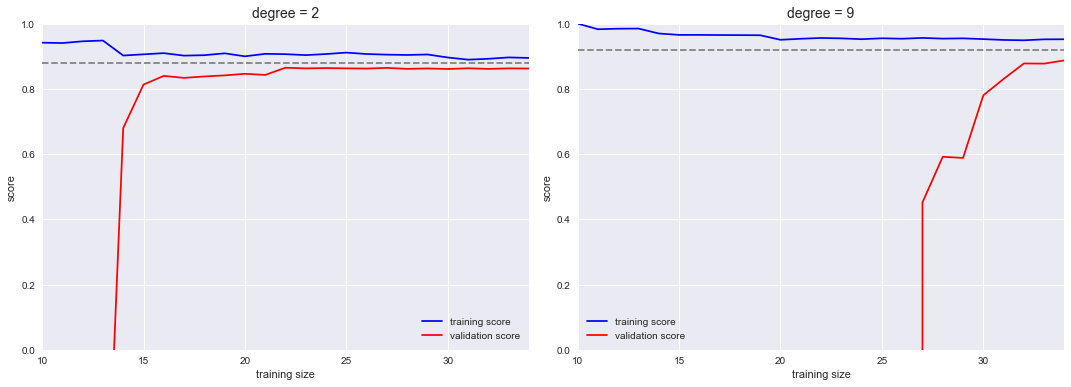

In [61]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
    X, y, cv=7,
    train_sizes=np.linspace(0.3, 1, 25))
    
    print(N)
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [62]:
learning_curve?

When your learning curve has already converged (i.e., when the training and validation curves are already close to each other), adding more training data will not significantly improve the fit! 
This situation is seen in the left panel, with the learning curve for the degree-2 model.

### Validation in Practice: Grid Search

In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multidimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid_search module. Here is an example of using grid search to find the optimal polynomial model.

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [64]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [66]:
model = grid.best_estimator_

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


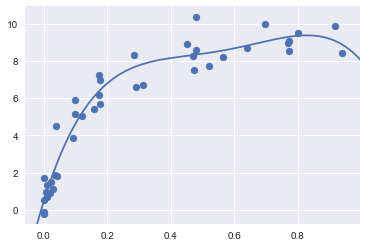

In [67]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

In [68]:
X_test.shape

(500, 1)

## Feature Engineering

### Categorical Features

In [69]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

One proven technique is to use **one-hot encoding**, which effectively creates
extra columns indicating the presence or absence of a category with a value of 1 or 0,
respectively.

When data comes as a list of dictionaries, Scikit-Learn’s **DictVectorizer** will do this for you:

In [76]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec_data = vec.fit_transform(data)

To see the meaning of each column, you can inspect the feature names:

In [81]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [82]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models.

**sklearn.preprocessing.OneHotEncoder** and **sklearn.feature_extraction.FeatureHasher** are two additional tools that ScikitLearn includes to support this type of encoding.

### Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. 

One of the simplest methods of encoding data is by *word counts*: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

In [83]:
sample = ['problem of evil',
'evil queen',
'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word “problem,” the word “evil,” the word “horizon,” and so on.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [88]:
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [89]:
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]], dtype=int64)

In [90]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


The raw word counts lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. 
One approach to fix this is known as term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents. 

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived Features

We saw that we could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!

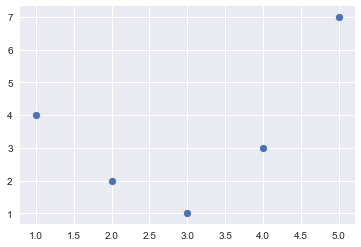

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

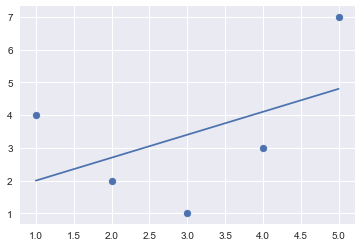

In [94]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

We need a more sophisticated model to describe the relationship between x and y.
We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. 
For example, we can add polynomial features to the data this way:

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


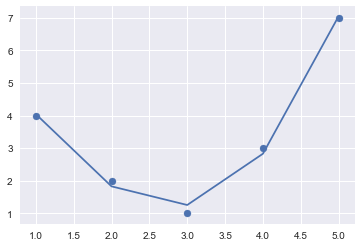

In [97]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.

### Imputation of Missing Data

In [98]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
[ 3, 7, 9 ],
[ 3, 5, 2 ],
[ 4, nan, 6 ],
[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the Imputer class:

In [99]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### Feature Pipelines

We might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

In [100]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
PolynomialFeatures(degree=2),
LinearRegression())

This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data.

In [101]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
